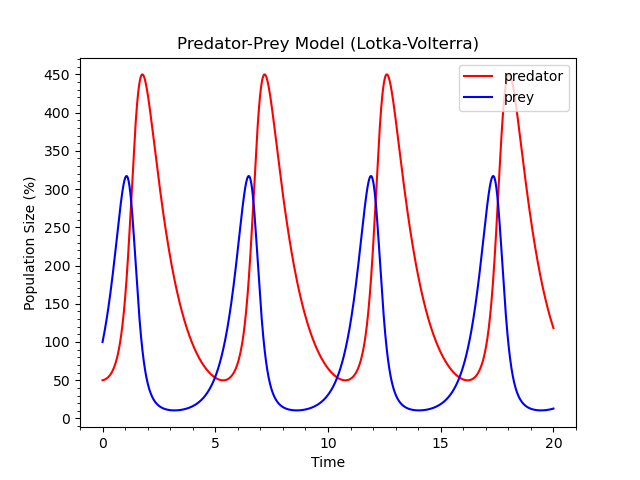

In [1]:
# predator_prey.ipynb
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator, MultipleLocator
from scipy.integrate import solve_ivp

# Modeling the Lotka-Volterra model from slide 70
# Note use of additional arguments needed
def model(time, state_vector, alpha, beta, delta, gamma):
    prey, pred = state_vector
    d_prey = alpha * prey - beta * prey * pred
    d_pred = delta * prey * pred - gamma * pred
    return d_prey, d_pred


def plot(ax):
    # Lotka-Volterra parameters
    alpha, beta, delta, gamma = 2.0, 1.1, 1.0, 0.9

    # Set initial conditions (% of population)
    prey_initial = 1.0
    predator_initial = 0.5

    # Set model duration (dimensionless)
    time_initial = 0
    time_final = 20

    # Estimate model behavior
    sol = solve_ivp(
        model,
        (time_initial, time_final),
        [prey_initial, predator_initial],
        max_step=0.01,
        args=[alpha, beta, delta, gamma],
    )
    time_steps = sol.t
    prey, pred = sol.y * 100

    ax.plot(time_steps, pred, label="predator", color="red")
    ax.plot(time_steps, prey, label="prey", color="blue")

    ax.set_title("Predator-Prey Model (Lotka-Volterra)")
    ax.set_xlabel("Time")
    ax.set_ylabel("Population Size (%)")

    ax.legend(loc="upper right")

    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.yaxis.set_major_locator(MultipleLocator(50))
    ax.yaxis.set_minor_locator(MultipleLocator(10))


def main():
    plt.close("all")
    fig = plt.figure(label="Lotka-Volterra")
    gs = fig.add_gridspec(1, 1)
    ax = fig.add_subplot(gs[0, 0])
    plot(ax)
    plt.show()


main()